In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Reading the data

In [3]:
train= pd.read_csv("/kaggle/input/titanic/train.csv")
test = pd.read_csv("/kaggle/input/titanic/test.csv")
df=pd.concat([train,test])

In [4]:
df.head()

PassengerId  Survived  Pclass  \
0            1       0.0       3   
1            2       1.0       1   
2            3       1.0       3   
3            4       1.0       1   
4            5       0.0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [5]:

df.shape

(1309, 12)

In [6]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [7]:
test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [8]:
train.shape

(891, 12)

In [9]:
test.shape

(418, 11)

# **Exploratory Data Analysis (EDA)**

In [10]:
train.isnull()

PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket  \
0          False     False   False  False  False  False  False  False   False   
1          False     False   False  False  False  False  False  False   False   
2          False     False   False  False  False  False  False  False   False   
3          False     False   False  False  False  False  False  False   False   
4          False     False   False  False  False  False  False  False   False   
..           ...       ...     ...    ...    ...    ...    ...    ...     ...   
886        False     False   False  False  False  False  False  False   False   
887        False     False   False  False  False  False  False  False   False   
888        False     False   False  False  False   True  False  False   False   
889        False     False   False  False  False  False  False  False   False   
890        False     False   False  False  False  False  False  False   False   

      Fare  Cabin  Embarked  
0    False   True     False  
1    False  False     False  
2    False   True     False  
3    False  False     False  
4    False   True     False  
..     ...    ...       ...  
886  False   True     False  
887  False  False     False  
888  False   True     False  
889  False  False     False  
890  False   True     False  

[891 rows x 12 columns]

<AxesSubplot:>

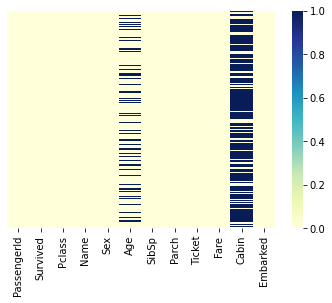

In [11]:
sns.heatmap(train.isnull(),yticklabels=False,cmap='YlGnBu')

<AxesSubplot:xlabel='Survived', ylabel='count'>

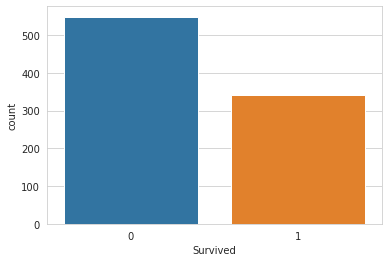

In [12]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

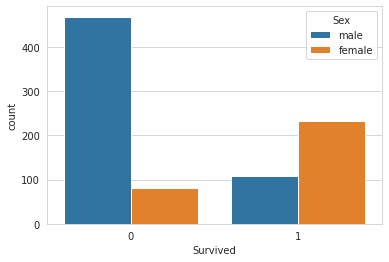

In [13]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

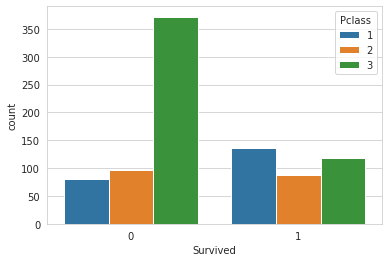

In [14]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue ='Pclass',data=train)

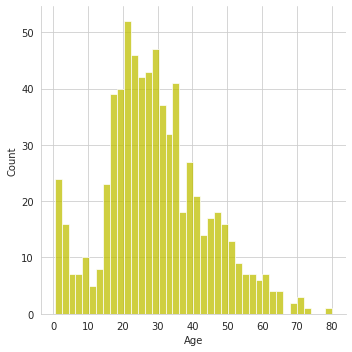

In [15]:
sns.displot(train['Age'].dropna(),kde=0,color='y',bins=40)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

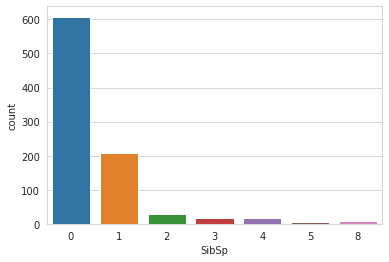

In [16]:
sns.countplot(x='SibSp',data=train)

# **Cleaning the Data**

Filling the missing Data

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

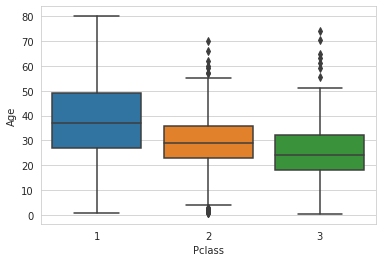

In [17]:
sns.boxplot(x='Pclass',y='Age',data=train
           )

In [18]:
def impute_age_train(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else :
            return 24
    else:
        return Age

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

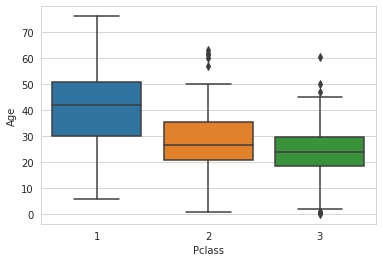

In [19]:
sns.boxplot(x='Pclass',y='Age',data=test
           )

In [20]:
def impute_age_test(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 42
        elif Pclass == 2:
            return 27
        else :
            return 25
    else:
        return Age

In [21]:
train[['Age','Pclass']]


Age  Pclass
0    22.0       3
1    38.0       1
2    26.0       3
3    35.0       1
4    35.0       3
..    ...     ...
886  27.0       2
887  19.0       1
888   NaN       3
889  26.0       1
890  32.0       3

[891 rows x 2 columns]

In [22]:
test[['Age','Pclass']]

Age  Pclass
0    34.5       3
1    47.0       3
2    62.0       2
3    27.0       3
4    22.0       3
..    ...     ...
413   NaN       3
414  39.0       1
415  38.5       3
416   NaN       3
417   NaN       3

[418 rows x 2 columns]

In [23]:
train['Age']=train[['Age','Pclass']].apply(impute_age_train,axis=1)
test['Age']=test[['Age','Pclass']].apply(impute_age_test,axis=1)

<AxesSubplot:>

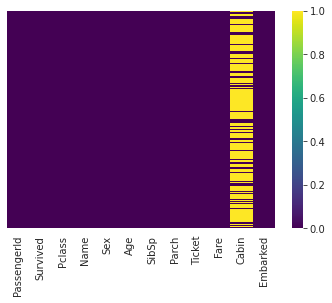

In [24]:
sns.heatmap(train.isnull(),yticklabels=False,cmap='viridis')

In [25]:
train.drop('Cabin',axis=1,inplace=True)
test.drop('Cabin',axis=1,inplace=True)

<AxesSubplot:>

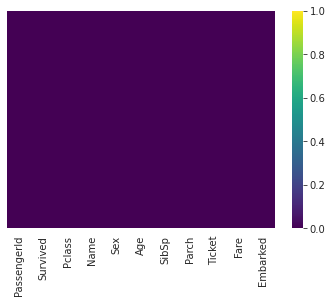

In [26]:
sns.heatmap(train.isnull(),yticklabels=False,cmap='viridis')

# **Categorical features**

In [27]:
Embarked = pd.get_dummies(train['Embarked'],drop_first=True)
Embarked_test = pd.get_dummies(test['Embarked'],drop_first=True)
Embarked.head()

Q  S
0  0  1
1  0  0
2  0  1
3  0  1
4  0  1

In [28]:
Sex=pd.get_dummies(train['Sex'],drop_first=True)
Sex_test=pd.get_dummies(test['Sex'],drop_first=True)
Sex.head()

male
0     1
1     0
2     0
3     0
4     1

In [29]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S

In [30]:
train.drop(['Sex','Name','Embarked','Ticket'],axis=1,inplace=True)
test.drop(['Sex','Name','Embarked','Ticket'],axis=1,inplace=True)

In [31]:
train.head()

PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare
0            1         0       3  22.0      1      0   7.2500
1            2         1       1  38.0      1      0  71.2833
2            3         1       3  26.0      0      0   7.9250
3            4         1       1  35.0      1      0  53.1000
4            5         0       3  35.0      0      0   8.0500

In [32]:
test.head()

PassengerId  Pclass   Age  SibSp  Parch     Fare
0          892       3  34.5      0      0   7.8292
1          893       3  47.0      1      0   7.0000
2          894       2  62.0      0      0   9.6875
3          895       3  27.0      0      0   8.6625
4          896       3  22.0      1      1  12.2875

In [33]:
train = pd.concat([train,Sex,Embarked],axis=1)
test = pd.concat([test,Sex_test,Embarked_test],axis=1)
train.head()

PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  male  Q  S
0            1         0       3  22.0      1      0   7.2500     1  0  1
1            2         1       1  38.0      1      0  71.2833     0  0  0
2            3         1       3  26.0      0      0   7.9250     0  0  1
3            4         1       1  35.0      1      0  53.1000     0  0  1
4            5         0       3  35.0      0      0   8.0500     1  0  1

In [34]:
train.drop('Survived',axis=1).head()

PassengerId  Pclass   Age  SibSp  Parch     Fare  male  Q  S
0            1       3  22.0      1      0   7.2500     1  0  1
1            2       1  38.0      1      0  71.2833     0  0  0
2            3       3  26.0      0      0   7.9250     0  0  1
3            4       1  35.0      1      0  53.1000     0  0  1
4            5       3  35.0      0      0   8.0500     1  0  1

In [35]:
train['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

# ****Building Model****

In [36]:
x_train = train.drop('Fare',axis=1)
x_train=x_train.drop('Survived',axis=1)
y_train = train['Survived']
x_train
    

PassengerId  Pclass   Age  SibSp  Parch  male  Q  S
0              1       3  22.0      1      0     1  0  1
1              2       1  38.0      1      0     0  0  0
2              3       3  26.0      0      0     0  0  1
3              4       1  35.0      1      0     0  0  1
4              5       3  35.0      0      0     1  0  1
..           ...     ...   ...    ...    ...   ... .. ..
886          887       2  27.0      0      0     1  0  1
887          888       1  19.0      0      0     0  0  1
888          889       3  24.0      1      2     0  0  1
889          890       1  26.0      0      0     1  0  0
890          891       3  32.0      0      0     1  1  0

[891 rows x 8 columns]

In [37]:
x_test = test.drop('Fare',axis=1)
x_test

PassengerId  Pclass   Age  SibSp  Parch  male  Q  S
0            892       3  34.5      0      0     1  1  0
1            893       3  47.0      1      0     0  0  1
2            894       2  62.0      0      0     1  1  0
3            895       3  27.0      0      0     1  0  1
4            896       3  22.0      1      1     0  0  1
..           ...     ...   ...    ...    ...   ... .. ..
413         1305       3  25.0      0      0     1  0  1
414         1306       1  39.0      0      0     0  0  0
415         1307       3  38.5      0      0     1  0  1
416         1308       3  25.0      0      0     1  0  1
417         1309       3  25.0      1      1     1  0  0

[418 rows x 8 columns]

# **Training and Prediction¶**

In [38]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier()
random_forest.fit(x_train,y_train)
#prediction = random_forest.predict(x_test)

RandomForestClassifier()

In [39]:
prediction = random_forest.predict(x_test)


In [40]:

prediction = np.array(prediction)
prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [41]:
random_forest.score(x_train,y_train)

0.9988776655443322

# **Evaluation**

In [42]:

Submission = pd.DataFrame()
Submission['PassengerId']= test['PassengerId']
Submission['Survived']=prediction

Submission

PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         0
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         1

[418 rows x 2 columns]

In [43]:
Submission.to_csv('submit.csv',index = False)